Segmentation data - Legend										
The dataset consists of information about the purchasing behavior of 2,000 individuals from a given area when entering a physical ‘FMCG’ store. All data has been collected through the loyalty cards they use at checkout. The data has been preprocessed and there are no missing values. In addition, the volume of the dataset has been restricted and anonymised to protect the privacy of the customers. 										
										
Variable	Data type	Range	Description							
ID	numerical	Integer	Shows a unique identificator of a customer.							
										
Sex	categorical	{0,1}	Biological sex (gender) of a customer. In this dataset there are only 2 different options.							
		0	male							
		1	female							
										
Marital status	categorical	{0,1}	Marital status of a customer.							
		0	single							
		1	non-single (divorced / separated / married / widowed)							
										
Age	numerical	Integer	The age of the customer in years, calculated as current year minus the year of birth of the customer at the time of creation of the dataset							
		18	Min value (the lowest age observed in the dataset)							
		76	Max value (the highest age observed in the dataset)							
										
Education	categorical	{0,1,2,3}	Level of education of the customer							
		0	other / unknown							
		1	high school							
		2	university							
		3	graduate school							
										
Income	numerical	Real	Self-reported annual income in US dollars of the customer.							
		35832	Min value (the lowest income observed in the dataset)							
		309364	Max value (the highest income observed in the dataset)							
										
Occupation	categorical	{0,1,2}	Category of occupation of the customer.							
		0	unemployed / unskilled							
		1	skilled employee / official							
		2	management / self-employed / highly qualified employee / officer							
										
Settlement size	categorical	{0,1,2}	The size of the city that the customer lives in.							
		0	small city							
		1	mid-sized city							
		2	big city							


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('segmentation data.csv')

In [3]:
data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [4]:
data.tail()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0
1999,100002000,0,0,25,0,68416,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [6]:
data.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [7]:
data.dtypes

ID                 int64
Sex                int64
Marital status     int64
Age                int64
Education          int64
Income             int64
Occupation         int64
Settlement size    int64
dtype: object

In [8]:
data.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [9]:
data.drop(columns=['ID'],inplace=True, axis=1)

In [10]:
#eda

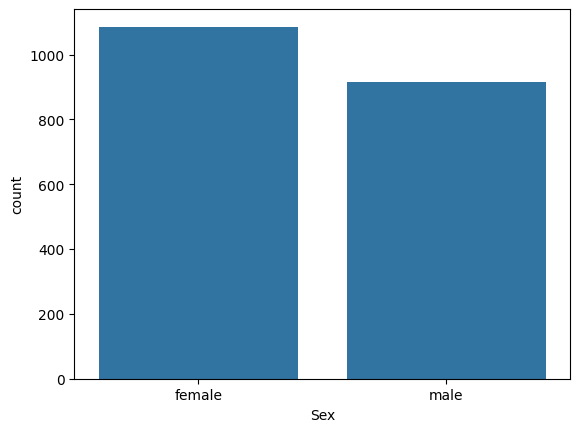

In [11]:
sns.countplot(x='Sex', data=data)
plt.xticks(ticks=[0,1] ,labels=['female','male'])
plt.show()

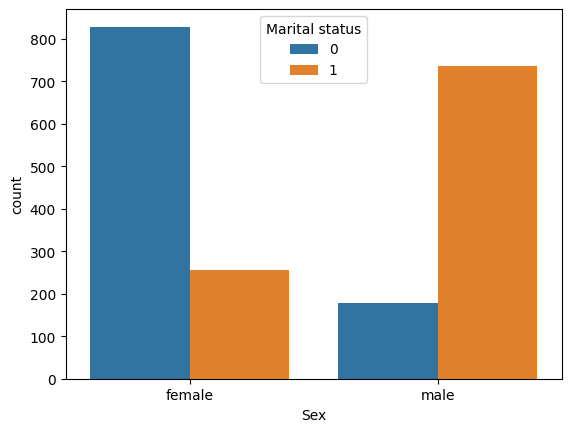

In [12]:
sns.countplot(x= 'Sex', hue='Marital status' ,data=data)
plt.xticks(ticks=[0,1],labels=['female','male'])
plt.show()

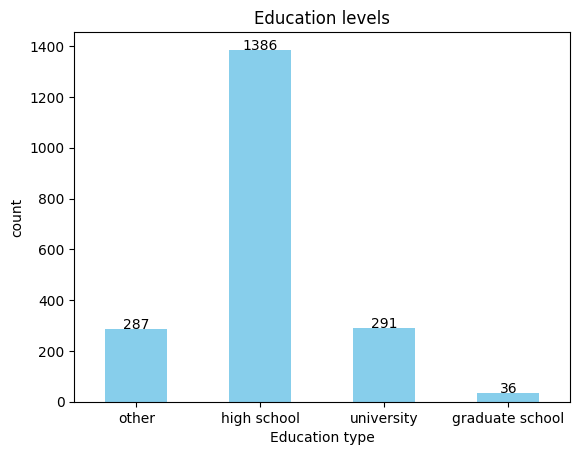

In [13]:
data['Education'].value_counts().sort_index().plot(kind='bar', color = 'skyblue')
for i, count in enumerate(data['Education'].value_counts().sort_index()):
    plt.text(i, count + 0.1, str(count), ha='center')
plt.title('Education levels')
plt.xlabel('Education type')
plt.ylabel('count')
plt.xticks(ticks=(0,1,2,3),labels=['other','high school','university', 'graduate school'],rotation=360)
plt.show()           

In [14]:
from sklearn.preprocessing import StandardScaler
ss =StandardScaler()
data =pd.DataFrame(ss.fit_transform(data))

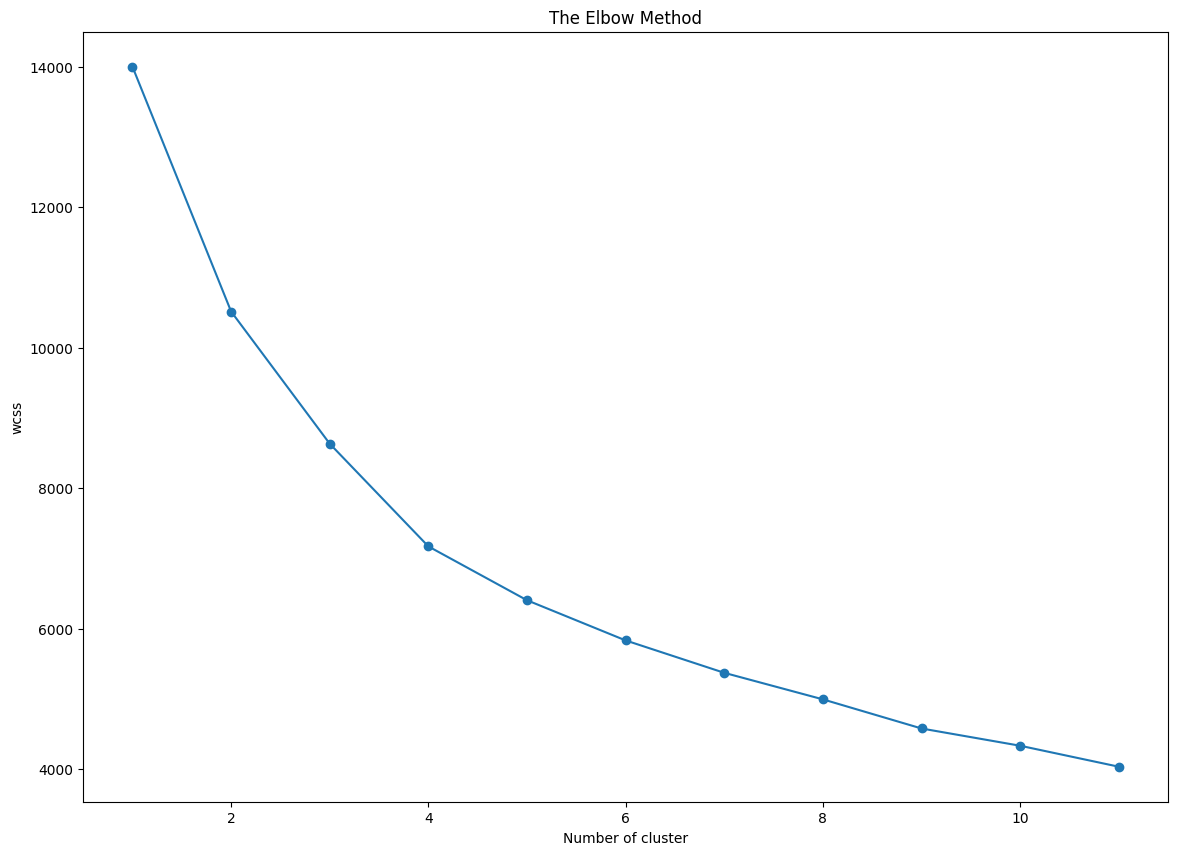

In [15]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,12):
    Kmeans= KMeans(n_clusters=i,init='k-means++',random_state=9)
    Kmeans.fit(data)
    wcss.append(Kmeans.inertia_)
plt.figure(figsize=(14,10))
plt.plot(range(1,12),wcss,marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('wcss')
plt.show()

In [16]:
#at cluster 4 we see declining in wcss decreasing rate

In [17]:
from sklearn.cluster import KMeans
kmeans= KMeans(n_clusters=4, init='k-means++', random_state=9)

In [18]:
y_pred = kmeans.fit_predict(data)

In [19]:
y_pred

array([3, 2, 1, ..., 1, 2, 1])

In [20]:
# Access cluster centers and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

In [21]:
#Evalution
print("Inertia:", kmeans.inertia_)

Inertia: 7169.87082246584


In [22]:
#silhouette_score
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(data, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.26879180394522123
